In [1]:
import pandas as pd

data= pd.read_csv("Drug_overdose_death_rates__by_drug_type__sex__age__race__and_Hispanic_origin__United_States.csv")

/var/folders/vc/xtfwnsr51nxbggkq88y5v6rc0000gn/T/ipykernel_15103/3920448392.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import altair as alt

filtered_data = data[(data['AGE'] == 'All ages') & (data['STUB_LABEL'] == 'All persons') & (data['STUB_NAME'] == 'Total')]

panel_mapping = {'Drug overdose deaths involving other synthetic opioids (other than methadone)': 'Synthetic opioids other than methadone', 
                 'Drug overdose deaths involving any opioid': 'Any opioid', 
                 'Drug overdose deaths involving heroin': 'Heroin', 
                 'Drug overdose deaths involving methadone': 'Methadone',
                 'Drug overdose deaths involving natural and semisynthetic opioids': 'Natural and semisynthetic opioids'}

agg_data = filtered_data.groupby(['YEAR', 'PANEL']).agg({'ESTIMATE': 'mean'}).reset_index()
agg_data['PANEL'] = agg_data['PANEL'].replace(panel_mapping)

line_chart = alt.Chart(agg_data).mark_line().encode(
     x=alt.X('YEAR:O', axis=alt.Axis(title='Year')),
    y=alt.Y('ESTIMATE:Q', axis=alt.Axis(title='Deaths per 100,000')),
        color=alt.Color('PANEL:N', legend=alt.Legend(title='Panel Element', titleLimit=600, orient='right', columns=1, labelLimit=0))  # Adjust titleLimit, orient, and columns,
).properties(
    title='Death Rates per 100,000 by Year (1999-2018) Based on Type of Overdose',
    width=500  
)
line_chart

alt.Chart(...)

In [3]:
filtered_data2 = data[(data['AGE'] == 'All ages') & (data['STUB_NAME'] == 'Sex') & (data['YEAR'] == 2018)]

panel_mapping = {'Drug overdose deaths involving other synthetic opioids (other than methadone)': 'Synthetic opioids other than methadone', 
                 'Drug overdose deaths involving any opioid': 'Any opioid', 
                 'Drug overdose deaths involving heroin': 'Heroin', 
                 'Drug overdose deaths involving methadone': 'Methadone',
                 'Drug overdose deaths involving natural and semisynthetic opioids': 'Natural and semisynthetic opioids'}

agg_data2 = filtered_data2.groupby(['YEAR', 'PANEL', 'STUB_LABEL']).agg({'ESTIMATE': 'mean'}).reset_index()

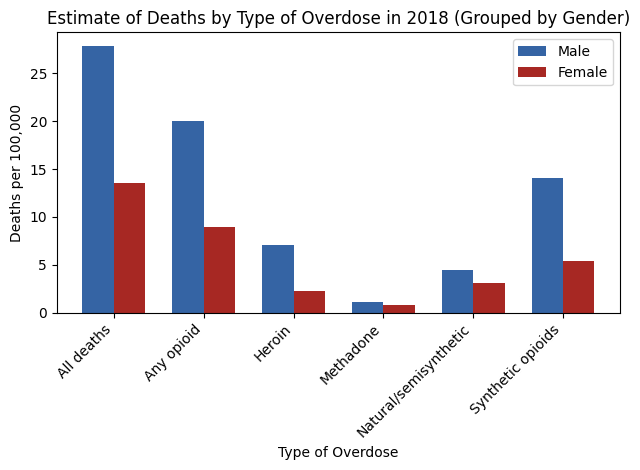

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ... (your data loading and processing code)

# Panel mapping
panel_mapping = {'All drug overdose deaths' : 'All deaths',
                 'Drug overdose deaths involving other synthetic opioids (other than methadone)': 'Synthetic opioids', 
                 'Drug overdose deaths involving any opioid': 'Any opioid', 
                 'Drug overdose deaths involving heroin': 'Heroin', 
                 'Drug overdose deaths involving methadone': 'Methadone',
                 'Drug overdose deaths involving natural and semisynthetic opioids': 'Natural/semisynthetic'}

agg_data2['PANEL'] = agg_data2['PANEL'].replace(panel_mapping)

# Filter data for the year 2018
agg_data_2018 = agg_data2[agg_data2['YEAR'] == 2018]

# Group by 'STUB_LABEL' and 'PANEL' for 'Male' and 'Female'
agg_data2_sex = agg_data2.groupby(['STUB_LABEL', 'PANEL']).agg({'ESTIMATE': 'mean'}).reset_index()

# Separate data for Male and Female
agg_data2_male = agg_data2_sex[agg_data2_sex['STUB_LABEL'] == 'Male']
agg_data2_female = agg_data2_sex[agg_data2_sex['STUB_LABEL'] == 'Female']

# Grouped bar chart
fig, ax = plt.subplots()
bar_width = 0.35
x_male = np.arange(len(agg_data2_male['PANEL']))
x_female = x_male + bar_width 


bar1 = ax.bar(x_male, agg_data2_male['ESTIMATE'], width=bar_width, label='Male', color='#3564A4')
bar2 = ax.bar(x_female, agg_data2_female['ESTIMATE'], width=bar_width, label='Female', color='#A72823')

# Labeling
ax.set_xlabel('Type of Overdose')
ax.set_ylabel('Deaths per 100,000')
ax.set_title('Estimate of Deaths by Type of Overdose in 2018 (Grouped by Gender)')
ax.set_xticks(x_male + bar_width/2)
ax.set_xticklabels(agg_data2_male['PANEL'], rotation=45, ha='right') 
ax.legend()

# Show the grouped bar chart
plt.tight_layout()
plt.show()


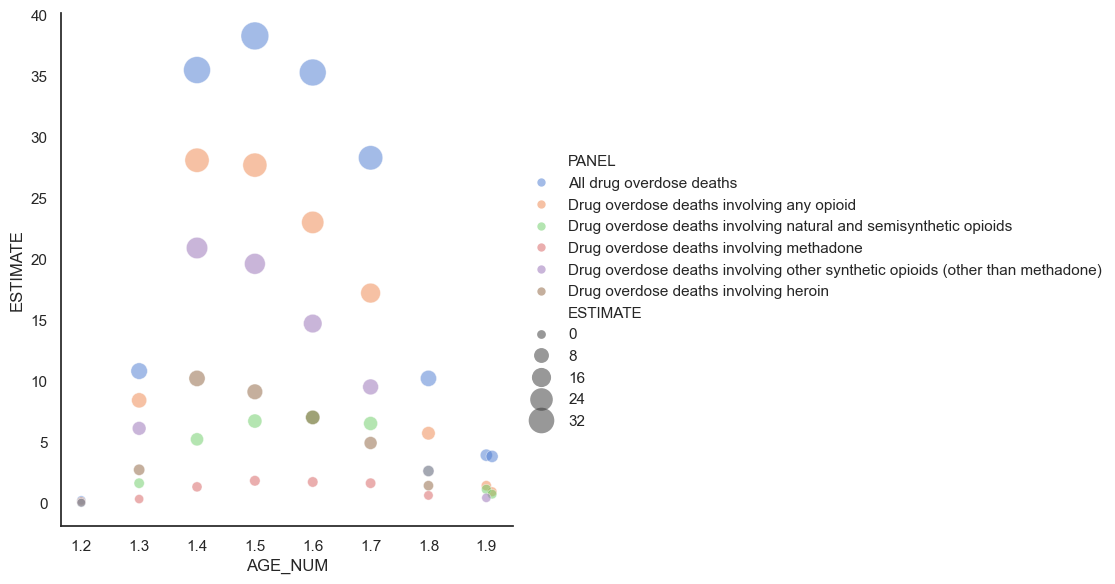

In [18]:
import seaborn as sns

sns.set_theme(style="white")

# Load the example mpg dataset
data = pd.read_csv("Drug_overdose_death_rates__by_drug_type__sex__age__race__and_Hispanic_origin__United_States.csv")

filtered_data = data[(data['YEAR'] == 2018) & (data['STUB_NAME'] == 'Age')]

sns.relplot(x="AGE_NUM", y="ESTIMATE", hue="PANEL", size="ESTIMATE",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=filtered_data)


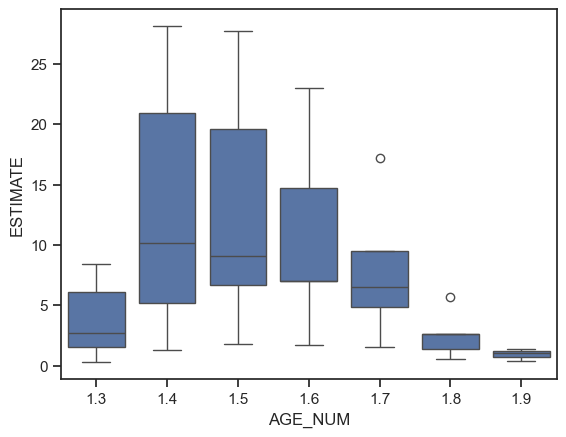

In [102]:
import seaborn as sns
import plotly.express as px
from plotly.graph_objs import *

sns.set_theme(style="ticks")
filtered_data = data[(data['YEAR'] == 2018) & (data['STUB_NAME'] == 'Age') & (data['PANEL'] != 'All drug overdose deaths') & (data['STUB_LABEL'] != 'Under 15 years')  & (data['STUB_LABEL'] != '85 years and over') ]
sns.boxplot(x="AGE_NUM", y="ESTIMATE", data=filtered_data)

fig = px.box(filtered_data, x="STUB_LABEL", y="ESTIMATE", title='Box Plot',
             labels={'ESTIMATE': 'Estimate', 'STUB_LABEL': 'Age'}, hover_data=['STUB_LABEL', 'ESTIMATE'], 
             width=1000, 
             height = 900,
             boxmode='group',
             )

fig.update_traces(width=0.5)
            
fig.show()


In [103]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(
    x= filtered_data['STUB_LABEL'],
    y=filtered_data['ESTIMATE'],
    mode='markers',
    marker=dict(
        color=[1, 5, 6, 7, 8, 9, 10],
        size=[10, 20, 30, 40, 50, 60, 70],
        showscale=True
        )
))

fig.show()

In [104]:
import plotly.graph_objects as go

#df = px.data.gapminder()

fig = px.scatter(x= filtered_data['STUB_LABEL'], y=filtered_data['ESTIMATE'],
	             color=filtered_data["PANEL"])
fig.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 93.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 96.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 80.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 65.0% of the points cannot be placed; you may want to decrease the size of the markers or use s

[Text(-61.25, 0.5, '')]

Error in callback <function _draw_all_if_interactive at 0x134b4eb60> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 62.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 62.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 70.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


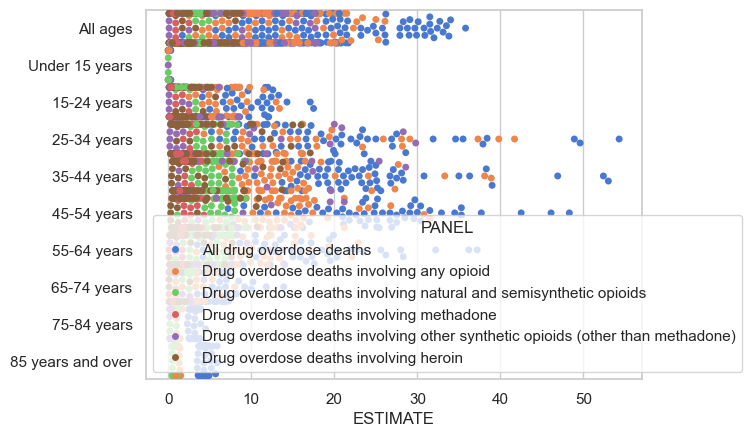

In [6]:
import seaborn as sns
sns.set_theme(style="whitegrid", palette="muted")

data2 = pd.read_csv("Drug_overdose_death_rates__by_drug_type__sex__age__race__and_Hispanic_origin__United_States.csv")

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=data, x="ESTIMATE", y="AGE", hue="PANEL")
ax.set(ylabel="")


In [ ]:
import plotly.express as px
data2 = pd.read_csv("Drug_overdose_death_rates__by_drug_type__sex__age__race__and_Hispanic_origin__United_States.csv")
filtered_data = data[(data['YEAR'] == 2018) & (data['STUB_NAME'] == 'Age') & data['AGE'] != 'All ages']


df = px.data.gapminder()


fig = px.scatter(filtered_data, x="PANEL", y="ESTIMATE",
	         size="ESTIMATE", color="AGE",
               log_x=True, size_max=60)
fig.show()